<a href="https://colab.research.google.com/github/japabon216/Trabajo_de_grado_SM_Para_Clasificacion_ADL_Algoritmos_SL/blob/main/Parte_11_Prueba_incremental_usando_las_etiquetas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Datasetsin16 = pd.read_csv('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Caracteristicas/Dataset_Final_para_batch_sin_16.csv')

In [ ]:
Datasetsin16

,segmento,Dataset,Activity,X_Acc_std,Y_Acc_std,Z_Acc_std,X_Gyro_std,Y_Gyro_std,Z_Gyro_std,X_Acc_mean,...,Z_Gyro_abslt,X_Acc_entropy,Y_Acc_entropy,Z_Acc_entropy,X_Gyro_entropy,Y_Gyro_entropy,Z_Gyro_entropy,Sensor_Type,Left_Right,Ubication
0,1,1,3,0.556724,0.239285,0.264039,NaN,NaN,NaN,-0.128850,...,NaN,8.869784,8.814765,8.825255,-0.000000,-0.000000,-0.000000,3,1,2
1,2,1,3,0.537785,0.214547,0.238416,NaN,NaN,NaN,-0.079838,...,NaN,8.739016,8.692726,8.655216,-0.000000,-0.000000,-0.000000,3,1,2
2,3,1,3,0.637531,0.214326,0.386845,NaN,NaN,NaN,-0.263432,...,NaN,8.917784,8.854765,8.877784,-0.000000,-0.000000,-0.000000,3,1,2
3,4,1,3,0.438566,0.235876,0.325491,NaN,NaN,NaN,-0.156160,...,NaN,8.838765,8.800726,8.878765,-0.000000,-0.000000,-0.000000,3,1,2
4,5,1,3,0.146831,0.931747,0.136279,NaN,NaN,NaN,0.069386,...,NaN,8.687216,8.629506,8.692196,-0.000000,-0.000000,-0.000000,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50355,255439,14,92,0.010366,0.004910,0.004387,0.007087,0.015720,0.008609,0.391500,...,0.006779,7.350722,6.991137,6.989265,4.667774,5.354898,4.776474,2,0,2
50356,255440,14,92,0.007642,0.003709,0.003556,0.006685,0.012076,0.007662,0.393547,...,0.006353,7.122322,6.852866,6.811416,4.588092,5.159502,4.690699,2,0,2
50357,255441,14,92,0.006443,0.003205,0.003226,0.006427,0.010841,0.006824,0.386389,...,0.005570,7.109361,6.709386,6.822272,4.544186,4.999300,4.535226,2,0,2
50358,255442,14,92,0.008432,0.004333,0.003977,0.007940,0.015388,0.010053,0.391080,...,0.008189,7.208515,6.932490,6.969884,4.821762,5.335375,5.025974,2,0,2


Vemos el porcentaje de cada dataset

In [ ]:
conteo_por_id = Datasetsin16['Dataset'].value_counts()

# Calcular el porcentaje
porcentaje_por_id = (conteo_por_id / len(Datasetsin16)) * 100

# Crear un DataFrame para mostrar los resultados
resultados = pd.DataFrame({'ID del Dataset': conteo_por_id.index, 'Cantidad de Filas': conteo_por_id, 'Porcentaje': porcentaje_por_id})

resultados

,ID del Dataset,Cantidad de Filas,Porcentaje
12,12,14343,28.480937
14,14,9182,18.232724
9,9,5580,11.080222
6,6,5480,10.881652
8,8,4530,8.995234
5,5,2804,5.567911
7,7,2443,4.851072
13,13,1929,3.830421
11,11,1423,2.825655
23,23,1104,2.192216


#Función

In [ ]:
pip install -U scikit-multiflow

In [ ]:
def calcular_entropia(datos):
    # Calcular las probabilidades de ocurrencia de cada valor
    unique_values, value_counts = np.unique(datos, return_counts=True)
    probabilities = value_counts / len(datos)

    # Calcular la entropía usando la fórmula de Shannon
    entropia = -np.sum(probabilities * np.log2(probabilities))

    return entropia

def promedio_absoluto(segmento):
    return segmento.abs().mean()

def calcular_promedio_resultante(segmento):
    sumatoria = np.sum(np.sqrt(segmento['X_Acc']**2 + segmento['Y_Acc']**2 + segmento['Z_Acc']**2))
    promedio = sumatoria / len(segmento)
    return promedio

def calcular_energia(segmento):
    sumatoria = np.sum(np.sqrt(segmento['X_Acc']**2 + segmento['Y_Acc']**2 + segmento['Z_Acc']**2))
    return sumatoria

def calcular_promedio_resultante_gyro(segmento):
    sumatoria = np.sum(np.sqrt(segmento['X_Gyro']**2 + segmento['Y_Gyro']**2 + segmento['Z_Gyro']**2))
    promedio = sumatoria / len(segmento)
    return promedio

def calcular_energia_gyro(segmento):
    sumatoria = np.sum(np.sqrt(segmento['X_Gyro']**2 + segmento['Y_Gyro']**2 + segmento['Z_Gyro']**2))
    return sumatoria

def Calculo_de_caracteristicas(df, filas_por_grupo=500):
    total_grupos = len(df) // filas_por_grupo
    resultados = pd.DataFrame()

    for i in range(total_grupos):
        inicio = i * filas_por_grupo
        fin = (i + 1) * filas_por_grupo
        resultado_fila = {}
        grupo = df.iloc[inicio:fin]

        for columna in ['X_Acc', 'Y_Acc', 'Z_Acc', 'X_Gyro', 'Y_Gyro', 'Z_Gyro']:
            resultado_fila[f'{columna}_entropy'] = calcular_entropia(grupo[columna])

        promedios = grupo[['X_Acc', 'Y_Acc', 'Z_Acc', 'X_Gyro', 'Y_Gyro', 'Z_Gyro']].mean()
        resultado_fila.update({
            'Activity': grupo['Activity'].iloc[0],
            'Code': grupo['Code'].iloc[0],
            'X_Acc_mean': promedios['X_Acc'],
            'Y_Acc_mean': promedios['Y_Acc'],
            'Z_Acc_mean': promedios['Z_Acc'],
            'X_Gyro_mean': promedios['X_Gyro'],
            'Y_Gyro_mean': promedios['Y_Gyro'],
            'Z_Gyro_mean': promedios['Z_Gyro']
        })

        std_deviation = grupo[['X_Acc', 'Y_Acc', 'Z_Acc', 'X_Gyro', 'Y_Gyro', 'Z_Gyro']].std()
        resultado_fila.update({
            'X_Acc_std': std_deviation['X_Acc'],
            'Y_Acc_std': std_deviation['Y_Acc'],
            'Z_Acc_std': std_deviation['Z_Acc'],
            'X_Gyro_std': std_deviation['X_Gyro'],
            'Y_Gyro_std': std_deviation['Y_Gyro'],
            'Z_Gyro_std': std_deviation['Z_Gyro']
        })

        median_values = grupo[['X_Acc', 'Y_Acc', 'Z_Acc', 'X_Gyro', 'Y_Gyro', 'Z_Gyro']].median()
        resultado_fila.update({
            'X_Acc_50': median_values['X_Acc'],
            'Y_Acc_50': median_values['Y_Acc'],
            'Z_Acc_50': median_values['Z_Acc'],
            'X_Gyro_50': median_values['X_Gyro'],
            'Y_Gyro_50': median_values['Y_Gyro'],
            'Z_Gyro_50': median_values['Z_Gyro']
        })

        max_values = grupo[['X_Acc', 'Y_Acc', 'Z_Acc', 'X_Gyro', 'Y_Gyro', 'Z_Gyro']].max()
        resultado_fila.update({
            'X_Acc_max': max_values['X_Acc'],
            'Y_Acc_max': max_values['Y_Acc'],
            'Z_Acc_max': max_values['Z_Acc'],
            'X_Gyro_max': max_values['X_Gyro'],
            'Y_Gyro_max': max_values['Y_Gyro'],
            'Z_Gyro_max': max_values['Z_Gyro']
        })

        min_values = grupo[['X_Acc', 'Y_Acc', 'Z_Acc', 'X_Gyro', 'Y_Gyro', 'Z_Gyro']].min()
        resultado_fila.update({
            'X_Acc_min': min_values['X_Acc'],
            'Y_Acc_min': min_values['Y_Acc'],
            'Z_Acc_min': min_values['Z_Acc'],
            'X_Gyro_min': min_values['X_Gyro'],
            'Y_Gyro_min': min_values['Y_Gyro'],
            'Z_Gyro_min': min_values['Z_Gyro']
        })

        promedio_absoluto_values = grupo[['X_Acc', 'Y_Acc', 'Z_Acc', 'X_Gyro', 'Y_Gyro', 'Z_Gyro']].apply(promedio_absoluto)
        resultado_fila.update({
            'X_Acc_abslt': promedio_absoluto_values['X_Acc'],
            'Y_Acc_abslt': promedio_absoluto_values['Y_Acc'],
            'Z_Acc_abslt': promedio_absoluto_values['Z_Acc'],
            'X_Gyro_abslt': promedio_absoluto_values['X_Gyro'],
            'Y_Gyro_abslt': promedio_absoluto_values['Y_Gyro'],
            'Z_Gyro_abslt': promedio_absoluto_values['Z_Gyro']
        })

        promedio_resultante_Acc = calcular_promedio_resultante(grupo[['X_Acc', 'Y_Acc', 'Z_Acc']])
        resultado_fila['promedio_resultante_Acc'] = promedio_resultante_Acc

        energia_Acc = calcular_energia(grupo[['X_Acc', 'Y_Acc', 'Z_Acc']])
        resultado_fila['energia_Acc'] = energia_Acc

        promedio_resultante_Gyro = calcular_promedio_resultante_gyro(grupo[['X_Gyro', 'Y_Gyro', 'Z_Gyro']])
        resultado_fila['promedio_resultante_Gyro'] = promedio_resultante_Gyro

        energia_Gyro = calcular_energia_gyro(grupo[['X_Gyro', 'Y_Gyro', 'Z_Gyro']])
        resultado_fila['energia_Gyro'] = energia_Gyro

        resultados = resultados.append(resultado_fila, ignore_index=True)

    resultados = resultados[['Activity','Code', 'X_Acc_entropy', 'Y_Acc_entropy', 'Z_Acc_entropy', 'X_Gyro_entropy', 'Y_Gyro_entropy', 'Z_Gyro_entropy', 'X_Acc_mean', 'Y_Acc_mean', 'Z_Acc_mean', 'X_Gyro_mean', 'Y_Gyro_mean', 'Z_Gyro_mean', 'X_Acc_std', 'Y_Acc_std', 'Z_Acc_std', 'X_Gyro_std', 'Y_Gyro_std', 'Z_Gyro_std', 'X_Acc_50', 'Y_Acc_50', 'Z_Acc_50', 'X_Gyro_50', 'Y_Gyro_50', 'Z_Gyro_50', 'X_Acc_max', 'Y_Acc_max', 'Z_Acc_max', 'X_Gyro_max', 'Y_Gyro_max', 'Z_Gyro_max', 'X_Acc_min', 'Y_Acc_min', 'Z_Acc_min', 'X_Gyro_min', 'Y_Gyro_min', 'Z_Gyro_min', 'X_Acc_abslt', 'Y_Acc_abslt', 'Z_Acc_abslt', 'X_Gyro_abslt', 'Y_Gyro_abslt', 'Z_Gyro_abslt', 'promedio_resultante_Acc', 'promedio_resultante_Gyro', 'energia_Acc', 'energia_Gyro']]

    resultados['Code'] = resultados['Code'].astype(str)

    resultados['Sensor_Type'] = ''
    resultados['Left_Right'] = ''
    resultados['Ubication'] = ''

    resultados['Sensor_Type'] = resultados['Code'].str.slice(0, 1)
    resultados['Left_Right'] = resultados['Code'].str.slice(1, 2)
    resultados['Ubication'] = resultados['Code'].str.slice(2, 3)

    resultados.drop(columns=['Code'], inplace=True)

    resultados['Sensor_Type'] = resultados['Sensor_Type'].astype(int)
    resultados['Left_Right'] = resultados['Left_Right'].astype(int)
    resultados['Ubication'] = resultados['Ubication'].astype(int)
    resultados['Activity'] = resultados['Activity'].astype(int)

    resultados = resultados.reindex(columns=['Activity','X_Acc_std', 'Y_Acc_std', 'Z_Acc_std', 'X_Gyro_std',
          'Y_Gyro_std', 'Z_Gyro_std', 'X_Acc_mean', 'Y_Acc_mean', 'Z_Acc_mean',
          'X_Gyro_mean', 'Y_Gyro_mean', 'Z_Gyro_mean', 'X_Acc_50', 'Y_Acc_50',
          'Z_Acc_50', 'X_Gyro_50', 'Y_Gyro_50', 'Z_Gyro_50', 'X_Acc_max',
          'Y_Acc_max', 'Z_Acc_max', 'X_Gyro_max', 'Y_Gyro_max', 'Z_Gyro_max',
          'X_Acc_min', 'Y_Acc_min', 'Z_Acc_min', 'X_Gyro_min', 'Y_Gyro_min',
          'Z_Gyro_min', 'promedio_resultante_Acc', 'promedio_resultante_Gyro',
          'energia_Acc', 'energia_Gyro', 'X_Acc_abslt', 'Y_Acc_abslt',
          'Z_Acc_abslt', 'X_Gyro_abslt', 'Y_Gyro_abslt', 'Z_Gyro_abslt',
          'X_Acc_entropy', 'Y_Acc_entropy', 'Z_Acc_entropy', 'X_Gyro_entropy',
          'Y_Gyro_entropy', 'Z_Gyro_entropy', 'Sensor_Type', 'Left_Right',
          'Ubication'])

    return resultados

#Carga del dataset 9

In [ ]:
Dataset = pd.read_csv('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Caracteristicas/Dataset_9_segmentado.csv')

In [ ]:
values_to_mantain = [6,13,14,16,17,18]

Dataset  = Dataset[Dataset['Activity'].isin(values_to_mantain)]

In [ ]:
dataset9_6 = Calculo_de_caracteristicas(Dataset)

In [ ]:
values_to_mantain = [6,16,17,18]

Dataset  = Dataset[Dataset['Activity'].isin(values_to_mantain)]

In [ ]:
dataset9_4  = Calculo_de_caracteristicas(Dataset)

#Carga del dataset 16

In [ ]:
Dataset = pd.read_csv('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Caracteristicas/Dataset_Final_Codigo_Separado.csv')

In [ ]:
Dataset16 = Dataset[Dataset['Dataset'] == 20]

In [ ]:
Dataset16 = Dataset16.drop(['Dataset', 'segmento'], axis=1)

In [ ]:
valores_interesantes = [6, 9, 13, 14,16,17,18]

Dataset16_7 = Dataset16[Dataset16['Activity'].isin(valores_interesantes)]

In [ ]:
valores_interesantes = [6,9,16,17,18]

Dataset16_5 = Dataset16[Dataset16['Activity'].isin(valores_interesantes)]

#Carga del dataset 5

In [ ]:
Datasetsin16 = pd.read_csv('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Caracteristicas/Dataset_Final_para_batch_sin_16.csv')

In [ ]:
Dataset5 = Datasetsin16[Datasetsin16['Dataset'] == 7]

In [ ]:
valores_interesantes = [6, 9, 13, 14,16,17,18]

Dataset5_7 = Dataset5[Dataset5['Activity'].isin(valores_interesantes)]

In [ ]:
Dataset5_7 = Dataset5_7.drop(['Dataset', 'segmento'], axis=1)

In [ ]:
valores_interesantes = [6,9,16,17,18]

Dataset5_5 = Dataset5[Dataset5['Activity'].isin(valores_interesantes)]
Dataset5_5 = Dataset5_5.drop(['Dataset', 'segmento'], axis=1)

#Carga del dataset 20

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Dataset20_Para_Prueba.csv')
dataset = dataset.fillna(0)

In [ ]:
dataset20_7  = Calculo_de_caracteristicas(dataset)

In [ ]:
values_to_mantain = [6,9,16,17,18]

dataset20_5  = dataset20_7[dataset20_7['Activity'].isin(values_to_mantain)]

In [ ]:
dataset20_5 = dataset20_5.reset_index(drop=True)

#7 actividades

##Dataset 9

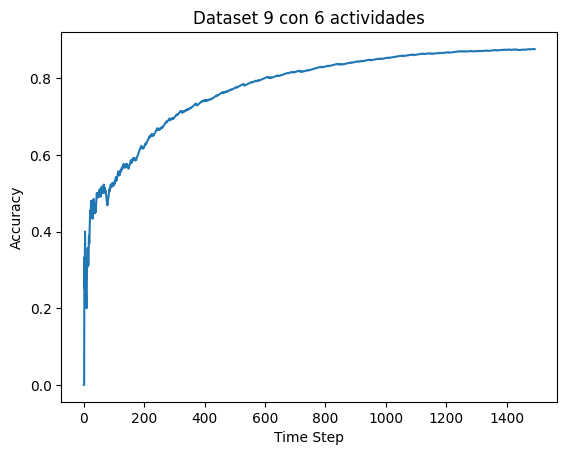

1494 samples analyzed.
Hoeffding accuracy: 0.8755020080321285
Precision: 0.8830510441471034
F1-score: 0.8760935991711599


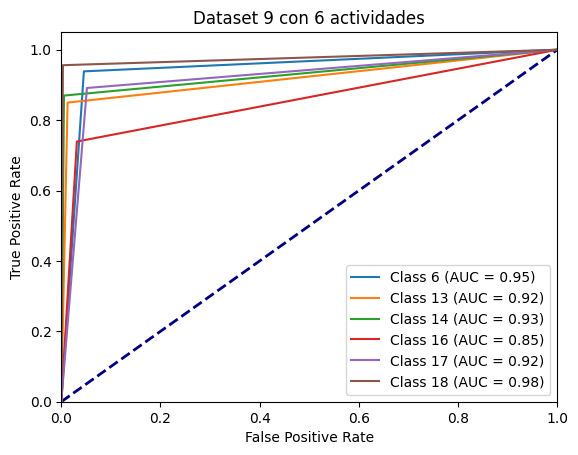

Average AUC (macro): 0.92
Accuracy for Class 16: 73.91%
Accuracy for Class 18: 95.60%
Accuracy for Class 17: 89.13%
Accuracy for Class 13: 84.98%
Accuracy for Class 6: 93.85%
Accuracy for Class 14: 86.98%


In [ ]:
from skmultiflow.data import SEAGenerator
from skmultiflow.meta import AdaptiveRandomForestClassifier
from skmultiflow.data import DataStream
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import joblib

np.random.seed(30)

df = dataset9_6.sample(frac=1)

target_idx = df.columns.get_loc("Activity")

tividades.pkl')

n_samples = 0
correct_cnt = 0
max_samples = 250000

y_true = []
y_pred = []


accuracy_history = []


while n_samples < max_samples and stream.has_more_samples():

    X, y = stream.next_sample()
    y_pred_batch = modelo.predict(X)

    y_true.append(y[0])
    y_pred.append(y_pred_batch[0])

    if y[0] == y_pred_batch[0]:
        correct_cnt += 1

    modelo = modelo.partial_fit(X, y)
    n_samples += 1


    accuracy = correct_cnt / n_samples
    accuracy_history.append(accuracy)



plt.figure()
plt.plot(range(len(accuracy_history)), accuracy_history)
plt.xlabel('Time Step')
plt.ylabel('Accuracy')
plt.title('Dataset 9 con 6 actividades')
plt.savefig('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Graficas Accuracy /Dataset9_6_Prueba_Incremental.png', dpi=300, bbox_inches='tight')
plt.show()

###################################

# Calcular métricas
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')  ay results
print('{} samples analyzed.'.format(n_samples))
print('Hoeffding accuracy: {}'.format(correct_cnt / n_samples))
print('Precision: {}'.format(precision))
print('F1-score: {}'.format(f1))

# Calcular métricas por clase
n_classes = len(np.unique(y_true))
roc_auc_scores = []

for class_label in np.unique(y_true):
    y_true_class = [1 if label == class_label else 0 for label in y_true]  # Convierte a binario
    y_pred_class = [1 if pred == class_label else 0 for pred in y_pred]  # Convierte a binario
    auc_class = roc_auc_score(y_true_class, y_pred_class)
    roc_auc_scores.append(auc_class)

plt.figure()
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

for class_label in np.unique(y_true):
    y_true_class = [1 if label == class_label else 0 for label in y_true]
    y_pred_class = [1 if pred == class_label else 0 for pred in y_pred]
    fpr, tpr, _ = roc_curve(y_true_class, y_pred_class)
    auc_class = roc_auc_score(y_true_class, y_pred_class)
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {auc_class:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Dataset 9 con 6 actividades')
plt.legend(loc="lower right")
plt.savefig('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/ROC/Dataset9_6_Prueba_Incremental.png', dpi=300, bbox_inches='tight')
plt.show()

average_auc_macro = np.mean(roc_auc_scores)
print(f'Average AUC (macro): {average_auc_macro:.2f}')

# Obtener los números de clase únicos desde la columna "Activity"
unique_classes = df["Activity"].unique()

# Crear un diccionario que asocie los números de clase con sus etiquetas correspondientes
class_labels_dict = {class_label: class_label for class_label in unique_classes}

# Calcular el accuracy por clase dividiendo el número de muestras correctamente clasificadas por el número total de muestras por clase
class_accuracy_percentage = []
for class_label in unique_classes:
    correct_for_class = sum(1 for true, pred in zip(y_true, y_pred) if true == class_label and true == pred)
    total_for_class = sum(1 for true in y_true if true == class_label)
    accuracy = correct_for_class / total_for_class
    class_accuracy_percentage.append(accuracy)

# Imprimir el accuracy por clase con el número de etiqueta
for class_label in unique_classes:
    accuracy = class_accuracy_percentage[unique_classes.tolist().index(class_label)]
    print(f'Accuracy for Class {class_label}: {accuracy:.2%}')

##Dataset 16

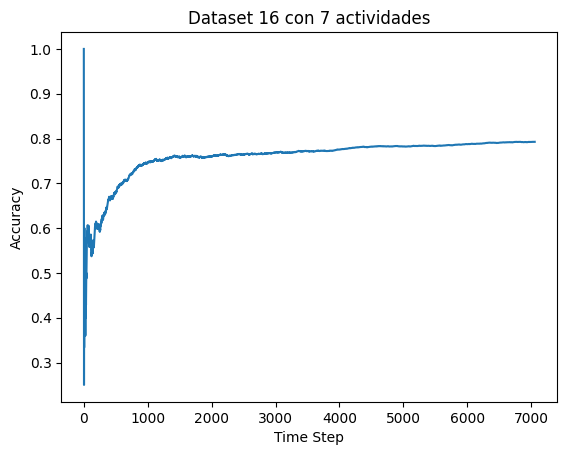

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


7058 samples analyzed.
Hoeffding accuracy: 0.7925758005100595
Precision: 0.29919557769026117
F1-score: 0.21619429353530634


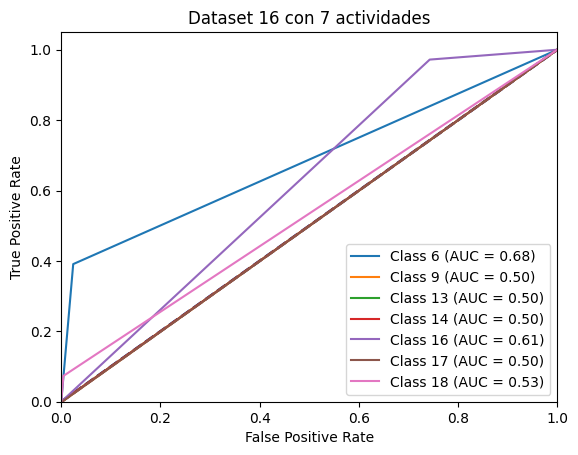

Average AUC (macro): 0.55
Accuracy for Class 16: 97.20%
Accuracy for Class 17: 0.00%
Accuracy for Class 18: 7.32%
Accuracy for Class 6: 39.10%
Accuracy for Class 13: 0.00%
Accuracy for Class 14: 0.00%
Accuracy for Class 9: 0.00%


In [ ]:
from skmultiflow.data import SEAGenerator
from skmultiflow.meta import AdaptiveRandomForestClassifier
from skmultiflow.data import DataStream
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import joblib

np.random.seed(30)

df = Dataset16_7.sample(frac=1)

target_idx = df.columns.get_loc("Activity")


stream = DataStream(df, target_idx=target_idx)

dom_Forest_7_Actividades.pkl')

true = []
y_pred = []


accuracy_history = []


while n_samples < max_samples and stream.has_more_samples():

    X, y = stream.next_sample()
    y_pred_batch = modelo.predict(X)

    y_true.append(y[0])
    y_pred.append(y_pred_batch[0])

    if y[0] == y_pred_batch[0]:
        correct_cnt += 1

    modelo = modelo.partial_fit(X, y)
    n_samples += 1


    accuracy = correct_cnt / n_samples
    accuracy_history.append(accuracy)



plt.figure()
plt.plot(range(len(accuracy_history)), accuracy_history)
plt.xlabel('Time Step')
plt.ylabel('Accuracy')
plt.title('Dataset 16 con 7 actividades')
plt.savefig('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Graficas Accuracy /Dataset16_7_Prueba_Incremental.png', dpi=300, bbox_inches='tight')
plt.show()

###################################

# Calcular métricas
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

s analyzed.'.format(n_samples))
print('Hoeffding accuracy: {}'.format(correct_cnt / n_samples))
print('Precision: {}'.format(precision))
print('F1-score: {}'.format(f1))

# Calcular métricas por clase
n_classes = len(np.unique(y_true))
roc_auc_scores = []

for class_label in np.unique(y_true):
    y_true_class = [1 if label == class_label else 0 for label in y_true]  # Convierte a binario
    y_pred_class = [1 if pred == class_label else 0 for pred in y_pred]  # Convierte a binario
    auc_class = roc_auc_score(y_true_class, y_pred_class)
    roc_auc_scores.append(auc_class)

plt.figure()
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

for class_label in np.unique(y_true):
    y_true_class = [1 if label == class_label else 0 for label in y_true]
    y_pred_class = [1 if pred == class_label else 0 for pred in y_pred]
    fpr, tpr, _ = roc_curve(y_true_class, y_pred_class)
    auc_class = roc_auc_score(y_true_class, y_pred_class)
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {auc_class:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Dataset 16 con 7 actividades')
plt.legend(loc="lower right")
plt.savefig('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/ROC/Dataset16_7_Prueba_Incremental.png', dpi=300, bbox_inches='tight')
plt.show()

average_auc_macro = np.mean(roc_auc_scores)
print(f'Average AUC (macro): {average_auc_macro:.2f}')

# Obtener los números de clase únicos desde la columna "Activity"
unique_classes = df["Activity"].unique()

# Crear un diccionario que asocie los números de clase con sus etiquetas correspondientes
class_labels_dict = {class_label: class_label for class_label in unique_classes}

# Calcular el accuracy por clase dividiendo el número de muestras correctamente clasificadas por el número total de muestras por clase
class_accuracy_percentage = []
for class_label in unique_classes:
    correct_for_class = sum(1 for true, pred in zip(y_true, y_pred) if true == class_label and true == pred)
    total_for_class = sum(1 for true in y_true if true == class_label)
    accuracy = correct_for_class / total_for_class
    class_accuracy_percentage.append(accuracy)

# Imprimir el accuracy por clase con el número de etiqueta
for class_label in unique_classes:
    accuracy = class_accuracy_percentage[unique_classes.tolist().index(class_label)]
    print(f'Accuracy for Class {class_label}: {accuracy:.2%}')

##Dataset 5

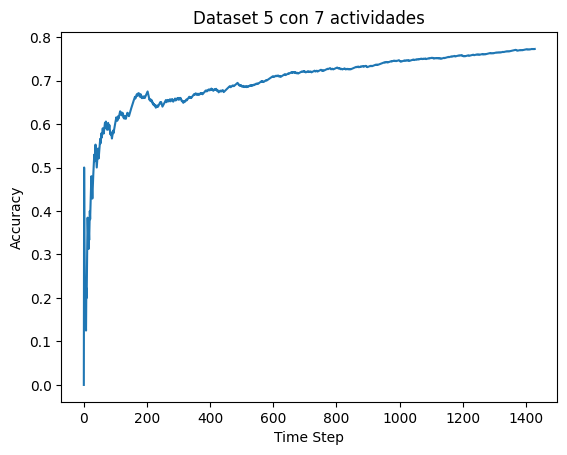

1429 samples analyzed.
Hoeffding accuracy: 0.7725682295311407
Precision: 0.7965555381016556
F1-score: 0.7484099113815177


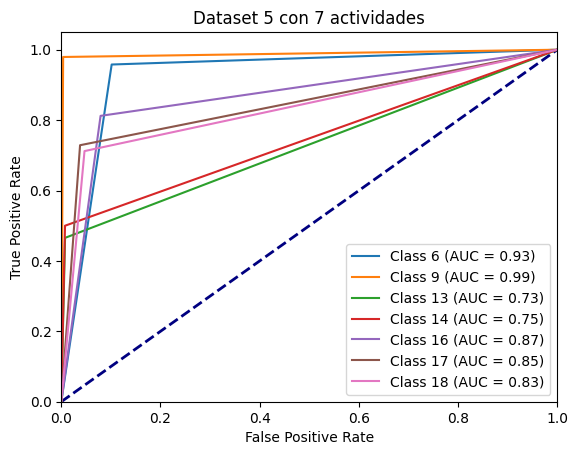

Average AUC (macro): 0.85
Accuracy for Class 17: 72.87%
Accuracy for Class 6: 95.80%
Accuracy for Class 14: 50.00%
Accuracy for Class 16: 81.21%
Accuracy for Class 18: 71.20%
Accuracy for Class 13: 46.55%
Accuracy for Class 9: 97.94%


In [ ]:
from skmultiflow.data import SEAGenerator
from skmultiflow.meta import AdaptiveRandomForestClassifier
from skmultiflow.data import DataStream
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import joblib

np.random.seed(30)

df = Dataset5_7.sample(frac=1)

target_idx = df.columns.get_loc("Activity")


stream = DataStream(df, target_idx=target_idx)


modelo = joblib.load('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Modelos/Random_Forest_7_Actividades.pkl')


n_samples = 0
correct_cnt = 0
max_samples = 250000

y_true = []
y_pred = []


accuracy_history = []


while n_samples < max_samples and stream.has_more_samples():

    X, y = stream.next_sample()
    y_pred_batch = modelo.predict(X)

    y_true.append(y[0])
    y_pred.append(y_pred_batch[0])

    if y[0] == y_pred_batch[0]:
        correct_cnt += 1

    modelo = modelo.partial_fit(X, y)
    n_samples += 1


    accuracy = correct_cnt / n_samples
    accuracy_history.append(accuracy)



plt.figure()
plt.plot(range(len(accuracy_history)), accuracy_history)
plt.xlabel('Time Step')
plt.ylabel('Accuracy')
plt.title('Dataset 5 con 7 actividades')
plt.savefig('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Graficas Accuracy /Dataset5_7_Prueba_Incremental.png', dpi=300, bbox_inches='tight')
plt.show()

###################################

# Calcular métricas
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')


print('{} samples analyzed.'.format(n_samples))
print('Hoeffding accuracy: {}'.format(correct_cnt / n_samples))
print('Precision: {}'.format(precision))
print('F1-score: {}'.format(f1))

# Calcular métricas por clase
n_classes = len(np.unique(y_true))
roc_auc_scores = []

for class_label in np.unique(y_true):
    y_true_class = [1 if label == class_label else 0 for label in y_true]  # Convierte a binario
    y_pred_class = [1 if pred == class_label else 0 for pred in y_pred]  # Convierte a binario
    auc_class = roc_auc_score(y_true_class, y_pred_class)
    roc_auc_scores.append(auc_class)

plt.figure()
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

for class_label in np.unique(y_true):
    y_true_class = [1 if label == class_label else 0 for label in y_true]
    y_pred_class = [1 if pred == class_label else 0 for pred in y_pred]
    fpr, tpr, _ = roc_curve(y_true_class, y_pred_class)
    auc_class = roc_auc_score(y_true_class, y_pred_class)
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {auc_class:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Dataset 5 con 7 actividades')
plt.legend(loc="lower right")
plt.savefig('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/ROC/Dataset5_7_Prueba_Incremental.png', dpi=300, bbox_inches='tight')
plt.show()

average_auc_macro = np.mean(roc_auc_scores)
print(f'Average AUC (macro): {average_auc_macro:.2f}')

# Obtener los números de clase únicos desde la columna "Activity"
unique_classes = df["Activity"].unique()

# Crear un diccionario que asocie los números de clase con sus etiquetas correspondientes
class_labels_dict = {class_label: class_label for class_label in unique_classes}

# Calcular el accuracy por clase dividiendo el número de muestras correctamente clasificadas por el número total de muestras por clase
class_accuracy_percentage = []
for class_label in unique_classes:
    correct_for_class = sum(1 for true, pred in zip(y_true, y_pred) if true == class_label and true == pred)
    total_for_class = sum(1 for true in y_true if true == class_label)
    accuracy = correct_for_class / total_for_class
    class_accuracy_percentage.append(accuracy)

# Imprimir el accuracy por clase con el número de etiqueta
for class_label in unique_classes:
    accuracy = class_accuracy_percentage[unique_classes.tolist().index(class_label)]
    print(f'Accuracy for Class {class_label}: {accuracy:.2%}')

##Dataset 20

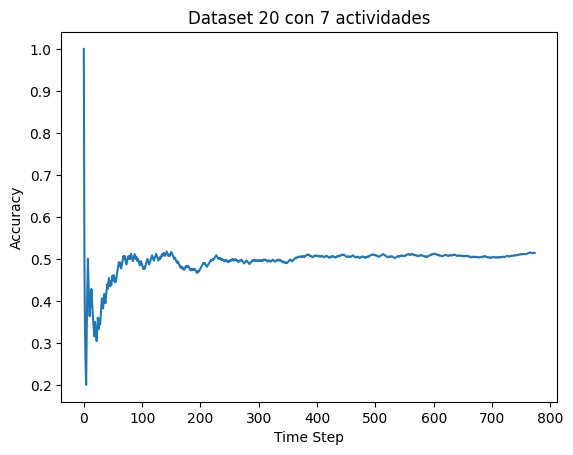

774 samples analyzed.
Hoeffding accuracy: 0.5142118863049095
Precision: 0.4907618603450553
F1-score: 0.4695067998878536


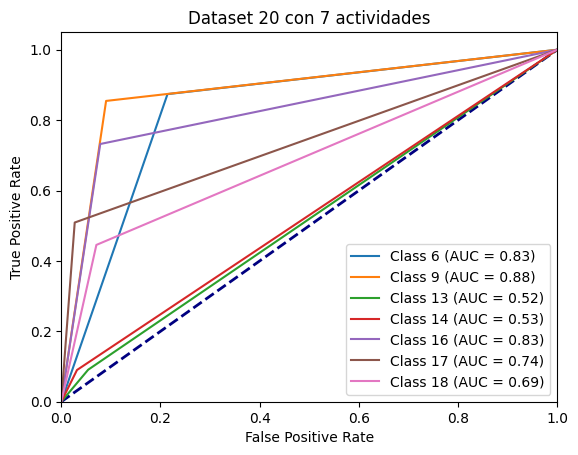

Average AUC (macro): 0.72
Accuracy for Class 6: 87.39%
Accuracy for Class 14: 9.01%
Accuracy for Class 16: 73.21%
Accuracy for Class 18: 44.55%
Accuracy for Class 9: 85.45%
Accuracy for Class 17: 50.91%
Accuracy for Class 13: 9.09%


In [ ]:
from skmultiflow.data import SEAGenerator
from skmultiflow.meta import AdaptiveRandomForestClassifier
from skmultiflow.data import DataStream
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import joblib

np.random.seed(30)

df = dataset20_7.sample(frac=1)

target_idx = df.columns.get_loc("Activity")


stream = DataStream(df, target_idx=target_idx)


modelo = joblib.load('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Modelos/Random_Forest_7_Actividades.pkl')


n_samples = 0
correct_cnt = 0
max_samples = 250000

y_true = []
y_pred = []


accuracy_history = []


while n_samples < max_samples and stream.has_more_samples():

    X, y = stream.next_sample()
    y_pred_batch = modelo.predict(X)

    y_true.append(y[0])
    y_pred.append(y_pred_batch[0])

    if y[0] == y_pred_batch[0]:
        correct_cnt += 1

    modelo = modelo.partial_fit(X, y)
    n_samples += 1


    accuracy = correct_cnt / n_samples
    accuracy_history.append(accuracy)



plt.figure()
plt.plot(range(len(accuracy_history)), accuracy_history)
plt.xlabel('Time Step')
plt.ylabel('Accuracy')
plt.title('Dataset 20 con 7 actividades')
plt.savefig('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Graficas Accuracy /Dataset20_7_Prueba_Incremental.png', dpi=300, bbox_inches='tight')
plt.show()

###################################

# Calcular métricas
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')


print('{} samples analyzed.'.format(n_samples))
print('Hoeffding accuracy: {}'.format(correct_cnt / n_samples))
print('Precision: {}'.format(precision))
print('F1-score: {}'.format(f1))

# Calcular métricas por clase
n_classes = len(np.unique(y_true))
roc_auc_scores = []

for class_label in np.unique(y_true):
    y_true_class = [1 if label == class_label else 0 for label in y_true]  # Convierte a binario
    y_pred_class = [1 if pred == class_label else 0 for pred in y_pred]  # Convierte a binario
    auc_class = roc_auc_score(y_true_class, y_pred_class)
    roc_auc_scores.append(auc_class)

plt.figure()
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

for class_label in np.unique(y_true):
    y_true_class = [1 if label == class_label else 0 for label in y_true]
    y_pred_class = [1 if pred == class_label else 0 for pred in y_pred]
    fpr, tpr, _ = roc_curve(y_true_class, y_pred_class)
    auc_class = roc_auc_score(y_true_class, y_pred_class)
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {auc_class:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Dataset 20 con 7 actividades')
plt.legend(loc="lower right")
plt.savefig('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/ROC/Dataset20_7_Prueba_Incremental.png', dpi=300, bbox_inches='tight')
plt.show()

average_auc_macro = np.mean(roc_auc_scores)
print(f'Average AUC (macro): {average_auc_macro:.2f}')

# Obtener los números de clase únicos desde la columna "Activity"
unique_classes = df["Activity"].unique()

# Crear un diccionario que asocie los números de clase con sus etiquetas correspondientes
class_labels_dict = {class_label: class_label for class_label in unique_classes}

# Calcular el accuracy por clase dividiendo el número de muestras correctamente clasificadas por el número total de muestras por clase
class_accuracy_percentage = []
for class_label in unique_classes:
    correct_for_class = sum(1 for true, pred in zip(y_true, y_pred) if true == class_label and true == pred)
    total_for_class = sum(1 for true in y_true if true == class_label)
    accuracy = correct_for_class / total_for_class
    class_accuracy_percentage.append(accuracy)

# Imprimir el accuracy por clase con el número de etiqueta
for class_label in unique_classes:
    accuracy = class_accuracy_percentage[unique_classes.tolist().index(class_label)]
    print(f'Accuracy for Class {class_label}: {accuracy:.2%}')

#5 actividades

##Dataset 9

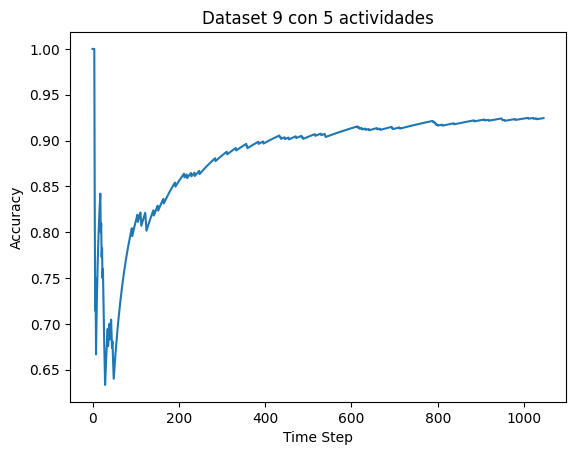

1046 samples analyzed.
Hoeffding accuracy: 0.9244741873804971
Precision: 0.9271823686956042
F1-score: 0.9245629642813422


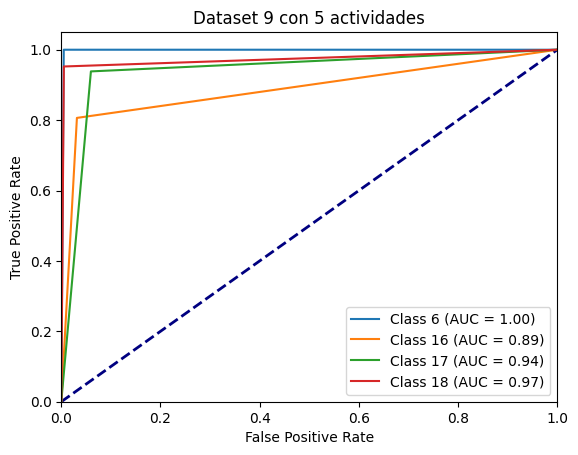

Average AUC (macro): 0.95
Accuracy for Class 18: 95.24%
Accuracy for Class 6: 100.00%
Accuracy for Class 17: 93.84%
Accuracy for Class 16: 80.63%


In [ ]:
from skmultiflow.data import SEAGenerator
from skmultiflow.meta import AdaptiveRandomForestClassifier
from skmultiflow.data import DataStream
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import joblib

np.random.seed(30)

df = dataset9_4.sample(frac=1)

target_idx = df.columns.get_loc("Activity")


stream = DataStream(df, target_idx=target_idx)


modelo = joblib.load('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Modelos/Random_Forest_5_Actividades.pkl')


n_samples = 0
correct_cnt = 0
max_samples = 250000

y_true = []
y_pred = []


accuracy_history = []


while n_samples < max_samples and stream.has_more_samples():

    X, y = stream.next_sample()
    y_pred_batch = modelo.predict(X)

    y_true.append(y[0])
    y_pred.append(y_pred_batch[0])

    if y[0] == y_pred_batch[0]:
        correct_cnt += 1

    modelo = modelo.partial_fit(X, y)
    n_samples += 1


    accuracy = correct_cnt / n_samples
    accuracy_history.append(accuracy)



plt.figure()
plt.plot(range(len(accuracy_history)), accuracy_history)
plt.xlabel('Time Step')
plt.ylabel('Accuracy')
plt.title('Dataset 9 con 5 actividades')
plt.savefig('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Graficas Accuracy /Dataset9_4_Prueba_Incremental.png', dpi=300, bbox_inches='tight')
plt.show()

###################################

# Calcular métricas
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')


print('{} samples analyzed.'.format(n_samples))
print('Hoeffding accuracy: {}'.format(correct_cnt / n_samples))
print('Precision: {}'.format(precision))
print('F1-score: {}'.format(f1))

# Calcular métricas por clase
n_classes = len(np.unique(y_true))
roc_auc_scores = []

for class_label in np.unique(y_true):
    y_true_class = [1 if label == class_label else 0 for label in y_true]  # Convierte a binario
    y_pred_class = [1 if pred == class_label else 0 for pred in y_pred]  # Convierte a binario
    auc_class = roc_auc_score(y_true_class, y_pred_class)
    roc_auc_scores.append(auc_class)

plt.figure()
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

for class_label in np.unique(y_true):
    y_true_class = [1 if label == class_label else 0 for label in y_true]
    y_pred_class = [1 if pred == class_label else 0 for pred in y_pred]
    fpr, tpr, _ = roc_curve(y_true_class, y_pred_class)
    auc_class = roc_auc_score(y_true_class, y_pred_class)
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {auc_class:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Dataset 9 con 5 actividades')
plt.legend(loc="lower right")
plt.savefig('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/ROC/Dataset9_4_Prueba_Incremental.png', dpi=300, bbox_inches='tight')
plt.show()

average_auc_macro = np.mean(roc_auc_scores)
print(f'Average AUC (macro): {average_auc_macro:.2f}')

# Obtener los números de clase únicos desde la columna "Activity"
unique_classes = df["Activity"].unique()

# Crear un diccionario que asocie los números de clase con sus etiquetas correspondientes
class_labels_dict = {class_label: class_label for class_label in unique_classes}

# Calcular el accuracy por clase dividiendo el número de muestras correctamente clasificadas por el número total de muestras por clase
class_accuracy_percentage = []
for class_label in unique_classes:
    correct_for_class = sum(1 for true, pred in zip(y_true, y_pred) if true == class_label and true == pred)
    total_for_class = sum(1 for true in y_true if true == class_label)
    accuracy = correct_for_class / total_for_class
    class_accuracy_percentage.append(accuracy)

# Imprimir el accuracy por clase con el número de etiqueta
for class_label in unique_classes:
    accuracy = class_accuracy_percentage[unique_classes.tolist().index(class_label)]
    print(f'Accuracy for Class {class_label}: {accuracy:.2%}')

##Dataset 16

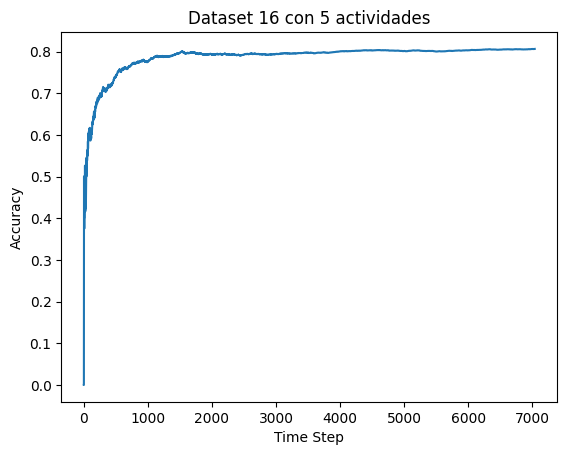

7042 samples analyzed.
Hoeffding accuracy: 0.8064470320931554
Precision: 0.5640160126026961
F1-score: 0.3246576311614063


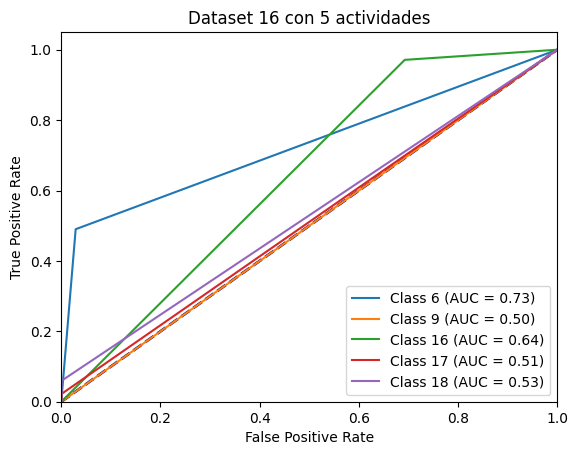

Average AUC (macro): 0.58
Accuracy for Class 16: 97.12%
Accuracy for Class 18: 5.97%
Accuracy for Class 6: 49.01%
Accuracy for Class 17: 2.28%
Accuracy for Class 9: 0.00%


In [ ]:
from skmultiflow.data import SEAGenerator
from skmultiflow.meta import AdaptiveRandomForestClassifier
from skmultiflow.data import DataStream
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import joblib

np.random.seed(30)

df = Dataset16_5.sample(frac=1)

target_idx = df.columns.get_loc("Activity")


stream = DataStream(df, target_idx=target_idx)


modelo = joblib.load('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Modelos/Random_Forest_5_Actividades.pkl')


n_samples = 0
correct_cnt = 0
max_samples = 250000

y_true = []
y_pred = []


accuracy_history = []


while n_samples < max_samples and stream.has_more_samples():

    X, y = stream.next_sample()
    y_pred_batch = modelo.predict(X)

    y_true.append(y[0])
    y_pred.append(y_pred_batch[0])

    if y[0] == y_pred_batch[0]:
        correct_cnt += 1

    modelo = modelo.partial_fit(X, y)
    n_samples += 1


    accuracy = correct_cnt / n_samples
    accuracy_history.append(accuracy)



plt.figure()
plt.plot(range(len(accuracy_history)), accuracy_history)
plt.xlabel('Time Step')
plt.ylabel('Accuracy')
plt.title('Dataset 16 con 5 actividades')
plt.savefig('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Graficas Accuracy /Dataset16_5_Prueba_Incremental.png', dpi=300, bbox_inches='tight')
plt.show()

###################################

# Calcular métricas
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')


print('{} samples analyzed.'.format(n_samples))
print('Hoeffding accuracy: {}'.format(correct_cnt / n_samples))
print('Precision: {}'.format(precision))
print('F1-score: {}'.format(f1))

# Calcular métricas por clase
n_classes = len(np.unique(y_true))
roc_auc_scores = []

for class_label in np.unique(y_true):
    y_true_class = [1 if label == class_label else 0 for label in y_true]  # Convierte a binario
    y_pred_class = [1 if pred == class_label else 0 for pred in y_pred]  # Convierte a binario
    auc_class = roc_auc_score(y_true_class, y_pred_class)
    roc_auc_scores.append(auc_class)

plt.figure()
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

for class_label in np.unique(y_true):
    y_true_class = [1 if label == class_label else 0 for label in y_true]
    y_pred_class = [1 if pred == class_label else 0 for pred in y_pred]
    fpr, tpr, _ = roc_curve(y_true_class, y_pred_class)
    auc_class = roc_auc_score(y_true_class, y_pred_class)
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {auc_class:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Dataset 16 con 5 actividades')
plt.legend(loc="lower right")
plt.savefig('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/ROC/Dataset16_5_Prueba_Incremental.png.png', dpi=300, bbox_inches='tight')
plt.show()

average_auc_macro = np.mean(roc_auc_scores)
print(f'Average AUC (macro): {average_auc_macro:.2f}')

# Obtener los números de clase únicos desde la columna "Activity"
unique_classes = df["Activity"].unique()

# Crear un diccionario que asocie los números de clase con sus etiquetas correspondientes
class_labels_dict = {class_label: class_label for class_label in unique_classes}

# Calcular el accuracy por clase dividiendo el número de muestras correctamente clasificadas por el número total de muestras por clase
class_accuracy_percentage = []
for class_label in unique_classes:
    correct_for_class = sum(1 for true, pred in zip(y_true, y_pred) if true == class_label and true == pred)
    total_for_class = sum(1 for true in y_true if true == class_label)
    accuracy = correct_for_class / total_for_class
    class_accuracy_percentage.append(accuracy)

# Imprimir el accuracy por clase con el número de etiqueta
for class_label in unique_classes:
    accuracy = class_accuracy_percentage[unique_classes.tolist().index(class_label)]
    print(f'Accuracy for Class {class_label}: {accuracy:.2%}')

##Dataset 5

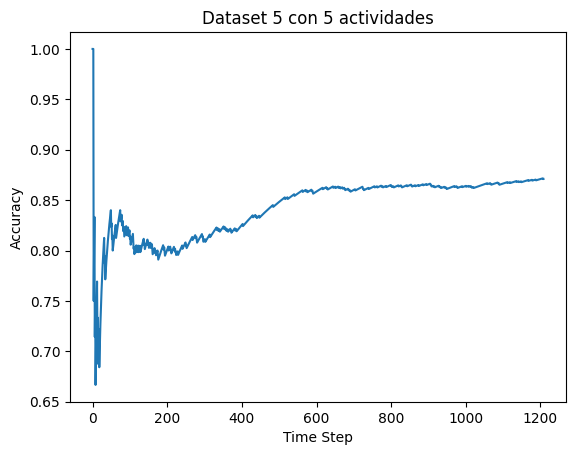

1209 samples analyzed.
Hoeffding accuracy: 0.8709677419354839
Precision: 0.8875941099083813
F1-score: 0.8742707143464772


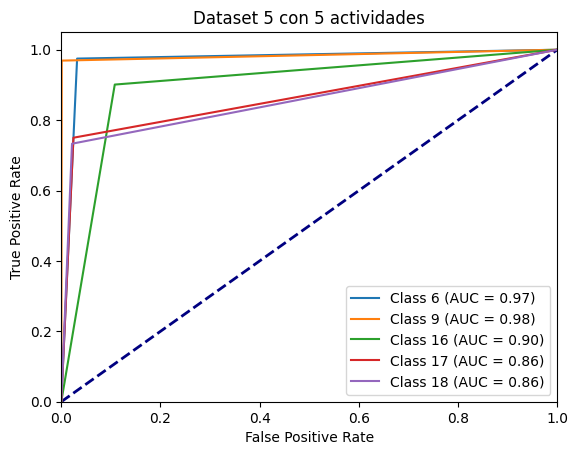

Average AUC (macro): 0.91
Accuracy for Class 16: 90.10%
Accuracy for Class 17: 75.00%
Accuracy for Class 9: 96.91%
Accuracy for Class 18: 73.30%
Accuracy for Class 6: 97.48%


In [ ]:
from skmultiflow.data import SEAGenerator
from skmultiflow.meta import AdaptiveRandomForestClassifier
from skmultiflow.data import DataStream
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import joblib

np.random.seed(30)

df = Dataset5_5.sample(frac=1)

target_idx = df.columns.get_loc("Activity")


stream = DataStream(df, target_idx=target_idx)


modelo = joblib.load('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Modelos/Random_Forest_5_Actividades.pkl')


n_samples = 0
correct_cnt = 0
max_samples = 250000

y_true = []
y_pred = []


accuracy_history = []


while n_samples < max_samples and stream.has_more_samples():

    X, y = stream.next_sample()
    y_pred_batch = modelo.predict(X)

    y_true.append(y[0])
    y_pred.append(y_pred_batch[0])

    if y[0] == y_pred_batch[0]:
        correct_cnt += 1

    modelo = modelo.partial_fit(X, y)
    n_samples += 1


    accuracy = correct_cnt / n_samples
    accuracy_history.append(accuracy)



plt.figure()
plt.plot(range(len(accuracy_history)), accuracy_history)
plt.xlabel('Time Step')
plt.ylabel('Accuracy')
plt.title('Dataset 5 con 5 actividades')
plt.savefig('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Graficas Accuracy /Dataset5_5_Prueba_Incremental.png', dpi=300, bbox_inches='tight')
plt.show()

###################################

# Calcular métricas
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')


print('{} samples analyzed.'.format(n_samples))
print('Hoeffding accuracy: {}'.format(correct_cnt / n_samples))
print('Precision: {}'.format(precision))
print('F1-score: {}'.format(f1))

# Calcular métricas por clase
n_classes = len(np.unique(y_true))
roc_auc_scores = []

for class_label in np.unique(y_true):
    y_true_class = [1 if label == class_label else 0 for label in y_true]  # Convierte a binario
    y_pred_class = [1 if pred == class_label else 0 for pred in y_pred]  # Convierte a binario
    auc_class = roc_auc_score(y_true_class, y_pred_class)
    roc_auc_scores.append(auc_class)

plt.figure()
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

for class_label in np.unique(y_true):
    y_true_class = [1 if label == class_label else 0 for label in y_true]
    y_pred_class = [1 if pred == class_label else 0 for pred in y_pred]
    fpr, tpr, _ = roc_curve(y_true_class, y_pred_class)
    auc_class = roc_auc_score(y_true_class, y_pred_class)
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {auc_class:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Dataset 5 con 5 actividades')
plt.legend(loc="lower right")
plt.savefig('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/ROC/Dataset5_5_Prueba_Incremental.png', dpi=300, bbox_inches='tight')
plt.show()

average_auc_macro = np.mean(roc_auc_scores)
print(f'Average AUC (macro): {average_auc_macro:.2f}')

# Obtener los números de clase únicos desde la columna "Activity"
unique_classes = df["Activity"].unique()

# Crear un diccionario que asocie los números de clase con sus etiquetas correspondientes
class_labels_dict = {class_label: class_label for class_label in unique_classes}

# Calcular el accuracy por clase dividiendo el número de muestras correctamente clasificadas por el número total de muestras por clase
class_accuracy_percentage = []
for class_label in unique_classes:
    correct_for_class = sum(1 for true, pred in zip(y_true, y_pred) if true == class_label and true == pred)
    total_for_class = sum(1 for true in y_true if true == class_label)
    accuracy = correct_for_class / total_for_class
    class_accuracy_percentage.append(accuracy)

# Imprimir el accuracy por clase con el número de etiqueta
for class_label in unique_classes:
    accuracy = class_accuracy_percentage[unique_classes.tolist().index(class_label)]
    print(f'Accuracy for Class {class_label}: {accuracy:.2%}')

##Dataset 20

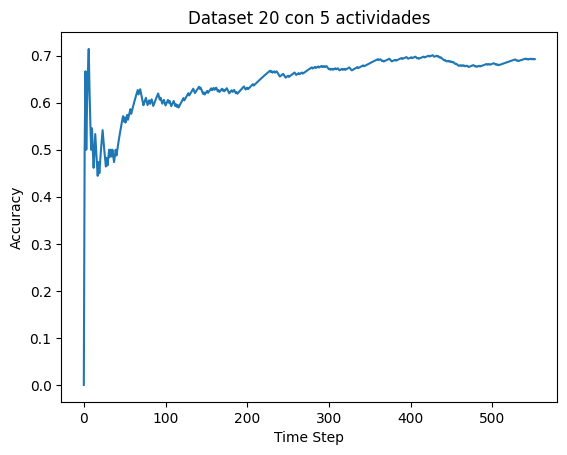

553 samples analyzed.
Hoeffding accuracy: 0.6925858951175407
Precision: 0.6975101995480003
F1-score: 0.6843081803768196


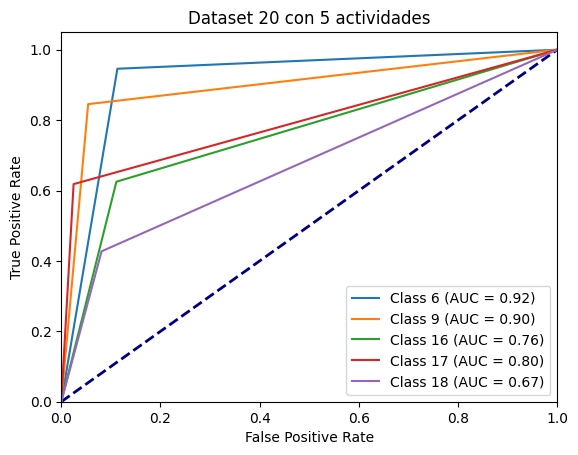

Average AUC (macro): 0.81
Accuracy for Class 9: 84.55%
Accuracy for Class 6: 94.59%
Accuracy for Class 18: 42.73%
Accuracy for Class 16: 62.50%
Accuracy for Class 17: 61.82%


In [ ]:
from skmultiflow.data import SEAGenerator
from skmultiflow.meta import AdaptiveRandomForestClassifier
from skmultiflow.data import DataStream
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import joblib

np.random.seed(30)

df = dataset20_5.sample(frac=1)

target_idx = df.columns.get_loc("Activity")


stream = DataStream(df, target_idx=target_idx)

modelo = joblib.load('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Modelos/Random_Forest_5_Actividades.pkl')


n_samples = 0
correct_cnt = 0
max_samples = 250000

y_true = []
y_pred = []


accuracy_history = []


while n_samples < max_samples and stream.has_more_samples():

    X, y = stream.next_sample()
    y_pred_batch = modelo.predict(X)

    y_true.append(y[0])
    y_pred.append(y_pred_batch[0])

    if y[0] == y_pred_batch[0]:
        correct_cnt += 1

    modelo = modelo.partial_fit(X, y)
    n_samples += 1


    accuracy = correct_cnt / n_samples
    accuracy_history.append(accuracy)



plt.figure()
plt.plot(range(len(accuracy_history)), accuracy_history)
plt.xlabel('Time Step')
plt.ylabel('Accuracy')
plt.title('Dataset 20 con 5 actividades')
plt.savefig('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/Graficas Accuracy /Dataset20_5_Prueba_Incremental.png', dpi=300, bbox_inches='tight')
plt.show()

###################################

# Calcular métricas
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')


print('{} samples analyzed.'.format(n_samples))
print('Hoeffding accuracy: {}'.format(correct_cnt / n_samples))
print('Precision: {}'.format(precision))
print('F1-score: {}'.format(f1))

# Calcular métricas por clase
n_classes = len(np.unique(y_true))
roc_auc_scores = []

for class_label in np.unique(y_true):
    y_true_class = [1 if label == class_label else 0 for label in y_true]  # Convierte a binario
    y_pred_class = [1 if pred == class_label else 0 for pred in y_pred]  # Convierte a binario
    auc_class = roc_auc_score(y_true_class, y_pred_class)
    roc_auc_scores.append(auc_class)

plt.figure()
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

for class_label in np.unique(y_true):
    y_true_class = [1 if label == class_label else 0 for label in y_true]
    y_pred_class = [1 if pred == class_label else 0 for pred in y_pred]
    fpr, tpr, _ = roc_curve(y_true_class, y_pred_class)
    auc_class = roc_auc_score(y_true_class, y_pred_class)
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {auc_class:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Dataset 20 con 5 actividades')
plt.legend(loc="lower right")
plt.savefig('/content/drive/MyDrive/TESIS_DATASET/Datasets definitivos_CSV/ROC/Dataset20_5_Prueba_Incremental.png.png', dpi=300, bbox_inches='tight')
plt.show()

average_auc_macro = np.mean(roc_auc_scores)
print(f'Average AUC (macro): {average_auc_macro:.2f}')

# Obtener los números de clase únicos desde la columna "Activity"
unique_classes = df["Activity"].unique()

# Crear un diccionario que asocie los números de clase con sus etiquetas correspondientes
class_labels_dict = {class_label: class_label for class_label in unique_classes}

# Calcular el accuracy por clase dividiendo el número de muestras correctamente clasificadas por el número total de muestras por clase
class_accuracy_percentage = []
for class_label in unique_classes:
    correct_for_class = sum(1 for true, pred in zip(y_true, y_pred) if true == class_label and true == pred)
    total_for_class = sum(1 for true in y_true if true == class_label)
    accuracy = correct_for_class / total_for_class
    class_accuracy_percentage.append(accuracy)

# Imprimir el accuracy por clase con el número de etiqueta
for class_label in unique_classes:
    accuracy = class_accuracy_percentage[unique_classes.tolist().index(class_label)]
    print(f'Accuracy for Class {class_label}: {accuracy:.2%}')